# Visualize the distribution of term entropy
- Need to run the first notebook before this exploratory analysis!

## Load GOATTOOLS that contains some description of GO

In [1]:
# Get http://geneontology.org/ontology/go-basic.obo
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()
# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
from goatools.base import download_ncbi_associations
gene2go = download_ncbi_associations()
from goatools.obo_parser import GODag
obodag = GODag("go-basic.obo")

  EXISTS: go-basic.obo
  EXISTS: gene2go
go-basic.obo: fmt(1.2) rel(2020-01-01) 47,337 GO Terms


## Load precomputed term entropy

In [2]:
import pandas as pd
term_entropy = pd.read_pickle("~/ontoPrune/data/term_entropy.pickle")


In [3]:
# add more info
term_entropy['name'] = [obodag[term].name for term in term_entropy.index]
term_entropy['level'] = [obodag[term].level for term in term_entropy.index] # original depth in GO
term_entropy['depth'] = [obodag[term].depth for term in term_entropy.index]

In [4]:
term_entropy.head()

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0000002,12.0,22,1.0,0.734947,mitochondrial genome maintenance,5,5
GO:0000003,5.0,1462,3.0,0.517207,reproduction,1,1
GO:0000010,2.0,2,0.0,1.000000,trans-hexaprenyltranstransferase activity,4,4
GO:0000012,12.0,13,2.0,0.969207,single strand break repair,6,8
GO:0000014,10.0,11,1.0,0.963938,single-stranded DNA endodeoxyribonuclease acti...,5,7


In [5]:
term_entropy.columns

Index(['direct gene count', 'indirect gene count', 'term count',
       'normalized entropy', 'name', 'level', 'depth'],
      dtype='object')

# Entropy distribution

- normalized entropy is not easily predicted by any of the variables

In [6]:
import seaborn as sns
g = sns.pairplot(term_entropy, diag_kind="kde", x_vars = ['direct gene count', 'indirect gene count', 'term count',
        'level', 'depth'], y_vars = ['normalized entropy'], kind = 'reg')

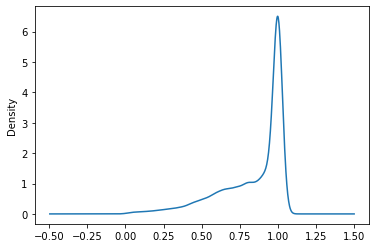

In [7]:
%matplotlib inline
term_entropy['normalized entropy'].plot.density()

In [8]:
term_entropy['normalized entropy'].min()

0.003259144267723053

In [9]:
term_entropy['normalized entropy'].max()

1.0000000000000004

# some examples of low information terms

In [10]:
pruned_go = pd.read_pickle("~/ontoPrune/data/prune_go_df.pickle")
def inspect_local_structure(lterm):
    '''see what happened for the low info terms'''
    
    child_id = pruned_go.loc[pruned_go['Parent'] == lterm]
    child_size = term_entropy.loc[child_id.loc[child_id['EdgeType'] == 'Child-Parent']['Child']]
    
    
    return(pd.DataFrame(term_entropy.loc[lterm]),pd.DataFrame(child_size))

In [11]:
term_entropy.loc[term_entropy['normalized entropy'] < 0.2].sort_values(by = 'normalized entropy')

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0036211,1.0,4127,1.0,0.003259,protein modification process,4,5
GO:0051674,1.0,1664,1.0,0.007293,localization of cell,2,2
GO:1902680,2.0,1642,1.0,0.009311,positive regulation of RNA biosynthetic process,7,8
GO:1902679,2.0,1285,1.0,0.011557,negative regulation of RNA biosynthetic process,7,8
GO:0097708,5.0,2381,2.0,0.012937,intracellular vesicle,4,5
...,...,...,...,...,...,...,...
GO:0005575,444.0,18857,5.0,0.198500,cellular_component,0,0
GO:0099146,3.0,54,1.0,0.198798,intrinsic component of postsynaptic density me...,7,7
GO:0001653,5.0,153,3.0,0.199264,peptide receptor activity,3,3
GO:0034340,8.0,98,1.0,0.199349,response to type I interferon,5,5


In [12]:
t,d = inspect_local_structure('GO:0036211')

In [13]:
t

,GO:0036211
direct gene count,1
indirect gene count,4127
term count,1
normalized entropy,0.00325914
name,protein modification process
level,4
depth,5


In [14]:
d

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0006464,98.0,4127,41.0,0.507747,cellular protein modification process,5,6


In [15]:
t,d = inspect_local_structure('GO:0097708')

In [16]:
t

,GO:0097708
direct gene count,5
indirect gene count,2381
term count,2
normalized entropy,0.0129373
name,intracellular vesicle
level,4
depth,5


In [17]:
d

,direct gene count,indirect gene count,term count,normalized entropy,name,level,depth
GO:0031410,283.0,2378,14.0,0.433629,cytoplasmic vesicle,5,6
GO:0097598,2.0,2,0.0,1.000000,sperm cytoplasmic droplet,5,6


In [18]:
# overwrite with more information
term_entropy.to_pickle("~/ontoPrune/data/term_entropy.pickle")